<a href="https://colab.research.google.com/github/Saqib1123f/Predictive-Modeling-of-Indoor-Air-Quality-/blob/main/Topic_02_Jan_26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modeling of Indoor Air Quality**



# **Importing Libraries and Loading file**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Indoor Air Pollution Data (1).csv')

# The raw CSV contains many empty 'Unnamed' columns; we keep only the first 9 relevant columns
df = df.iloc[:, :9]
print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (173468, 9)


/tmp/ipython-input-3951559734.py:14: DtypeWarning: Columns (1,4,5,6,7,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Indoor Air Pollution Data (1).csv')


# **Preprocessing and Cleaning**

In [3]:
# 1. Convert sensor readings to numeric, turning invalid data into NaN
cols_to_fix = ['NO2', 'Temp', 'Pressure', 'Humidity', 'O3']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Fix the Date column
# Replace '|' with a space and convert to datetime.
# errors='coerce' handles values like "0.13" by turning them into NaT
df['Date'] = df['Date'].astype(str).str.replace('|', ' ', regex=False)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 3. Drop all rows that contain any NaN or NaT (invalid dates or readings)
df = df.dropna()

print("Data Cleaning Complete. Remaining Rows:", len(df))
print(df.head())

Data Cleaning Complete. Remaining Rows: 169932
    NH3   NO2    CO  PM2.5   Temp  Pressure  Humidity     O3  \
0  0.60  0.16  4.01   0.00  33.53    948.26     51.98   7.37   
1  0.62  0.15  4.13   0.39  33.50    948.18     51.53   9.06   
2  0.69  0.14  4.45   0.39  33.36    948.15     50.50  16.47   
3  0.70  0.14  4.52   0.38  32.18    948.14     53.35   9.80   
4  0.72  0.14  4.56   0.40  31.77    948.08     53.70  17.28   

                        Date  
0 2020-11-17 11:20:53.407872  
1 2020-11-17 11:22:41.214724  
2 2020-11-17 11:24:28.546567  
3 2020-11-17 11:26:16.884289  
4 2020-11-17 11:28:19.820781  


# **Exploratry Data Analysis**

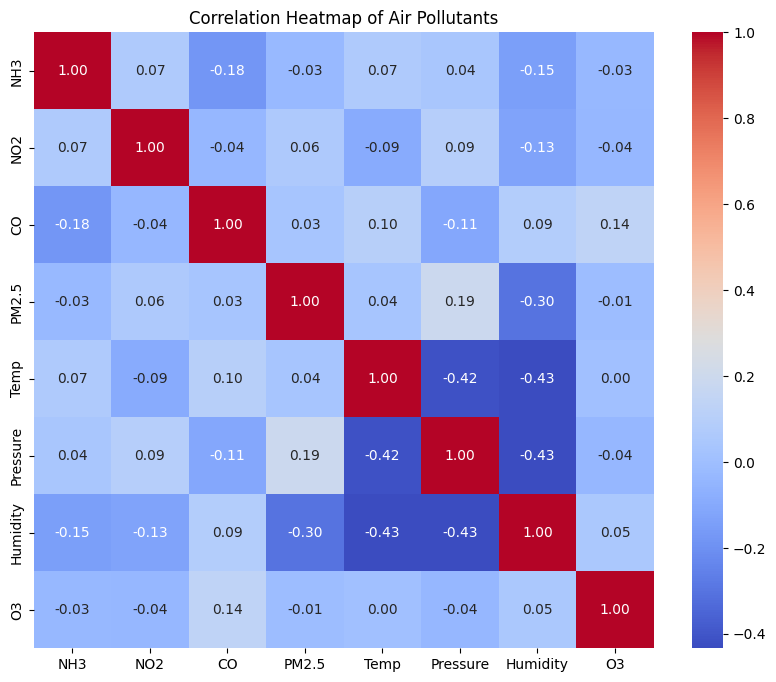

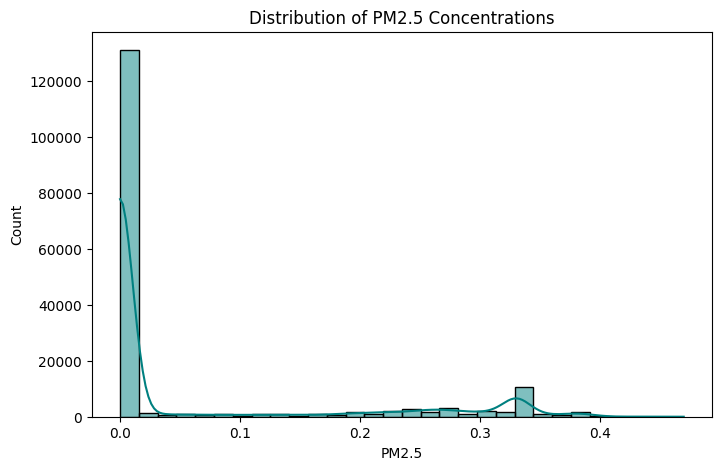

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Pollutants")
plt.savefig('correlation_heatmap.png')

# Distribution of Target Variable (PM2.5)
plt.figure(figsize=(8, 5))
sns.histplot(df['PM2.5'], kde=True, bins=30, color='teal')
plt.title("Distribution of PM2.5 Concentrations")
plt.savefig('pm25_distribution.png')

In [5]:
# Features (X) and Target (y)
X = df[['NH3', 'NO2', 'CO', 'Temp', 'Pressure', 'Humidity', 'O3']]
y = df['PM2.5']

# Sample 5000 rows for faster processing
X_sample = X.sample(5000, random_state=42)
y_sample = y.loc[X_sample.index]

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Scale data (crucial for SVR and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Prepared for Modeling.")

Data Prepared for Modeling.
